In [1]:
from train_data_pre import dataloader_with_label
from Model.protrain_model import combing_model
from Model.downstream_model import Downstream_Class
import torch
import torch.nn as nn
from tqdm import tqdm    # 进度条
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
pre_model = combing_model()
pre_model.load_state_dict(torch.load('pre_train_3.pth', weights_only=True))

<All keys matched successfully>

In [3]:
class_model = Downstream_Class()
epoches = 200
acc_list = []
loss_list =[]
optimizer = torch.optim.Adam(class_model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
criterion = nn.BCELoss()

In [4]:
class_model.to(device)
pre_model.to(device)
for epoch in range(epoches):
    pre_model.eval()   # 冻结
    class_model.train()  # 训练
    train_loss = 0.0
    acc_num = 0.0
    progress = tqdm(dataloader_with_label, desc=f'Epoch {epoch + 1}/{epoches}')
    for inputs, labels in progress:
        inputs, labels = inputs.to(device), labels.to(device)
        # 前向传播
        with torch.no_grad():
            cls, _ = pre_model(inputs)
        outputs = class_model(cls)
        # 反向传播
        optimizer.zero_grad()
        labels = labels.float() 
        outputs = outputs.reshape([outputs.shape[0],1])
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        # 计算准确度
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct = (predicted == labels).sum().item()
        acc_num +=  correct
        # 更新进度条显示
        progress.set_postfix(loss=loss.item())
    if (epoch+1) % 10 == 0:
        scheduler.step()
    epoch_train_loss = train_loss / len(dataloader_with_label)
    acc = acc_num / (len(dataloader_with_label)*8)
    acc_list.append(acc)
    loss_list.append(epoch_train_loss)
    print(f'Epoch {epoch + 1} - Train Loss: {epoch_train_loss:.4f}')
    print(f'Epoch {epoch + 1} - ACC : {acc:.4f}')
    

Epoch 1/200: 100%|██████████| 67/67 [00:02<00:00, 29.57it/s, loss=0.734]


Epoch 1 - Train Loss: 0.6933
Epoch 1 - ACC : 0.4981


Epoch 2/200: 100%|██████████| 67/67 [00:01<00:00, 36.39it/s, loss=0.682]


Epoch 2 - Train Loss: 0.6915
Epoch 2 - ACC : 0.4981


Epoch 3/200: 100%|██████████| 67/67 [00:01<00:00, 36.24it/s, loss=0.653]


Epoch 3 - Train Loss: 0.6813
Epoch 3 - ACC : 0.4981


Epoch 4/200: 100%|██████████| 67/67 [00:01<00:00, 36.41it/s, loss=0.602]


Epoch 4 - Train Loss: 0.6660
Epoch 4 - ACC : 0.4981


Epoch 5/200: 100%|██████████| 67/67 [00:01<00:00, 35.64it/s, loss=0.761]


Epoch 5 - Train Loss: 0.6112
Epoch 5 - ACC : 0.4981


Epoch 6/200: 100%|██████████| 67/67 [00:01<00:00, 35.84it/s, loss=0.704]


Epoch 6 - Train Loss: 0.5281
Epoch 6 - ACC : 0.4981


Epoch 7/200: 100%|██████████| 67/67 [00:01<00:00, 36.63it/s, loss=0.198]


Epoch 7 - Train Loss: 0.4799
Epoch 7 - ACC : 0.4981


Epoch 8/200: 100%|██████████| 67/67 [00:01<00:00, 36.23it/s, loss=0.531]


Epoch 8 - Train Loss: 0.4462
Epoch 8 - ACC : 0.4981


Epoch 9/200: 100%|██████████| 67/67 [00:01<00:00, 37.43it/s, loss=0.565]


Epoch 9 - Train Loss: 0.4261
Epoch 9 - ACC : 0.4981


Epoch 10/200: 100%|██████████| 67/67 [00:01<00:00, 37.40it/s, loss=0.831]


Epoch 10 - Train Loss: 0.4275
Epoch 10 - ACC : 0.4981


Epoch 11/200: 100%|██████████| 67/67 [00:01<00:00, 36.67it/s, loss=0.747]


Epoch 11 - Train Loss: 0.4160
Epoch 11 - ACC : 0.4981


Epoch 12/200: 100%|██████████| 67/67 [00:01<00:00, 38.01it/s, loss=0.248]


Epoch 12 - Train Loss: 0.4375
Epoch 12 - ACC : 0.4981


Epoch 13/200: 100%|██████████| 67/67 [00:01<00:00, 37.50it/s, loss=0.542]


Epoch 13 - Train Loss: 0.4387
Epoch 13 - ACC : 0.4981


Epoch 14/200: 100%|██████████| 67/67 [00:01<00:00, 36.60it/s, loss=0.8]  


Epoch 14 - Train Loss: 0.4345
Epoch 14 - ACC : 0.4981


Epoch 15/200: 100%|██████████| 67/67 [00:01<00:00, 37.19it/s, loss=1.04]  


Epoch 15 - Train Loss: 0.4303
Epoch 15 - ACC : 0.4981


Epoch 16/200: 100%|██████████| 67/67 [00:01<00:00, 37.86it/s, loss=0.843]


Epoch 16 - Train Loss: 0.4564
Epoch 16 - ACC : 0.4981


Epoch 17/200: 100%|██████████| 67/67 [00:01<00:00, 38.71it/s, loss=0.91] 


Epoch 17 - Train Loss: 0.4201
Epoch 17 - ACC : 0.4981


Epoch 18/200: 100%|██████████| 67/67 [00:01<00:00, 37.01it/s, loss=0.696]


Epoch 18 - Train Loss: 0.4222
Epoch 18 - ACC : 0.4981


Epoch 19/200: 100%|██████████| 67/67 [00:01<00:00, 36.95it/s, loss=0.265]


Epoch 19 - Train Loss: 0.3966
Epoch 19 - ACC : 0.4981


Epoch 20/200: 100%|██████████| 67/67 [00:01<00:00, 37.66it/s, loss=1.22]  


Epoch 20 - Train Loss: 0.4073
Epoch 20 - ACC : 0.4981


Epoch 21/200: 100%|██████████| 67/67 [00:01<00:00, 37.44it/s, loss=0.133] 


Epoch 21 - Train Loss: 0.4068
Epoch 21 - ACC : 0.4981


Epoch 22/200: 100%|██████████| 67/67 [00:01<00:00, 37.25it/s, loss=3.57] 


Epoch 22 - Train Loss: 0.4610
Epoch 22 - ACC : 0.4981


Epoch 23/200: 100%|██████████| 67/67 [00:01<00:00, 36.71it/s, loss=0.764]


Epoch 23 - Train Loss: 0.4718
Epoch 23 - ACC : 0.4981


Epoch 24/200: 100%|██████████| 67/67 [00:01<00:00, 37.64it/s, loss=0.523]


Epoch 24 - Train Loss: 0.4232
Epoch 24 - ACC : 0.4981


Epoch 25/200: 100%|██████████| 67/67 [00:01<00:00, 37.53it/s, loss=1.77] 


Epoch 25 - Train Loss: 0.4338
Epoch 25 - ACC : 0.4981


Epoch 26/200: 100%|██████████| 67/67 [00:01<00:00, 37.80it/s, loss=0.358] 


Epoch 26 - Train Loss: 0.4115
Epoch 26 - ACC : 0.4981


Epoch 27/200: 100%|██████████| 67/67 [00:01<00:00, 37.01it/s, loss=0.14] 


Epoch 27 - Train Loss: 0.4168
Epoch 27 - ACC : 0.4981


Epoch 28/200: 100%|██████████| 67/67 [00:01<00:00, 37.19it/s, loss=0.846] 


Epoch 28 - Train Loss: 0.4270
Epoch 28 - ACC : 0.4981


Epoch 29/200: 100%|██████████| 67/67 [00:01<00:00, 37.04it/s, loss=0.281]


Epoch 29 - Train Loss: 0.4524
Epoch 29 - ACC : 0.4981


Epoch 30/200: 100%|██████████| 67/67 [00:01<00:00, 37.54it/s, loss=0.195]


Epoch 30 - Train Loss: 0.3994
Epoch 30 - ACC : 0.4981


Epoch 31/200: 100%|██████████| 67/67 [00:01<00:00, 36.22it/s, loss=0.128]


Epoch 31 - Train Loss: 0.4181
Epoch 31 - ACC : 0.4981


Epoch 32/200: 100%|██████████| 67/67 [00:01<00:00, 36.87it/s, loss=0.232]


Epoch 32 - Train Loss: 0.4112
Epoch 32 - ACC : 0.4981


Epoch 33/200: 100%|██████████| 67/67 [00:01<00:00, 36.61it/s, loss=1.48] 


Epoch 33 - Train Loss: 0.3928
Epoch 33 - ACC : 0.4981


Epoch 34/200: 100%|██████████| 67/67 [00:01<00:00, 37.51it/s, loss=0.545] 


Epoch 34 - Train Loss: 0.4109
Epoch 34 - ACC : 0.4981


Epoch 35/200: 100%|██████████| 67/67 [00:01<00:00, 37.00it/s, loss=1.12] 


Epoch 35 - Train Loss: 0.4101
Epoch 35 - ACC : 0.4981


Epoch 36/200: 100%|██████████| 67/67 [00:01<00:00, 36.79it/s, loss=0.0239]


Epoch 36 - Train Loss: 0.4056
Epoch 36 - ACC : 0.4981


Epoch 37/200: 100%|██████████| 67/67 [00:01<00:00, 37.58it/s, loss=0.514] 


Epoch 37 - Train Loss: 0.4032
Epoch 37 - ACC : 0.4981


Epoch 38/200: 100%|██████████| 67/67 [00:01<00:00, 37.11it/s, loss=1.74] 


Epoch 38 - Train Loss: 0.4430
Epoch 38 - ACC : 0.4981


Epoch 39/200: 100%|██████████| 67/67 [00:01<00:00, 35.93it/s, loss=0.661]


Epoch 39 - Train Loss: 0.4202
Epoch 39 - ACC : 0.4981


Epoch 40/200: 100%|██████████| 67/67 [00:01<00:00, 37.85it/s, loss=0.0605]


Epoch 40 - Train Loss: 0.4160
Epoch 40 - ACC : 0.4981


Epoch 41/200: 100%|██████████| 67/67 [00:01<00:00, 36.93it/s, loss=2.01] 


Epoch 41 - Train Loss: 0.4267
Epoch 41 - ACC : 0.4981


Epoch 42/200: 100%|██████████| 67/67 [00:01<00:00, 36.40it/s, loss=0.0485]


Epoch 42 - Train Loss: 0.4060
Epoch 42 - ACC : 0.4981


Epoch 43/200: 100%|██████████| 67/67 [00:01<00:00, 37.46it/s, loss=0.254]


Epoch 43 - Train Loss: 0.4168
Epoch 43 - ACC : 0.4981


Epoch 44/200: 100%|██████████| 67/67 [00:01<00:00, 37.85it/s, loss=1.23] 


Epoch 44 - Train Loss: 0.4259
Epoch 44 - ACC : 0.4981


Epoch 45/200: 100%|██████████| 67/67 [00:01<00:00, 37.00it/s, loss=1.09] 


Epoch 45 - Train Loss: 0.4230
Epoch 45 - ACC : 0.4981


Epoch 46/200: 100%|██████████| 67/67 [00:01<00:00, 36.57it/s, loss=1.04] 


Epoch 46 - Train Loss: 0.4411
Epoch 46 - ACC : 0.4981


Epoch 47/200: 100%|██████████| 67/67 [00:01<00:00, 37.49it/s, loss=0.218] 


Epoch 47 - Train Loss: 0.3962
Epoch 47 - ACC : 0.4981


Epoch 48/200: 100%|██████████| 67/67 [00:01<00:00, 36.55it/s, loss=0.108] 


Epoch 48 - Train Loss: 0.3904
Epoch 48 - ACC : 0.4981


Epoch 49/200: 100%|██████████| 67/67 [00:01<00:00, 36.61it/s, loss=0.019]


Epoch 49 - Train Loss: 0.3928
Epoch 49 - ACC : 0.4981


Epoch 50/200: 100%|██████████| 67/67 [00:01<00:00, 37.22it/s, loss=0.0202]


Epoch 50 - Train Loss: 0.4113
Epoch 50 - ACC : 0.4981


Epoch 51/200: 100%|██████████| 67/67 [00:01<00:00, 36.16it/s, loss=0.128]


Epoch 51 - Train Loss: 0.4111
Epoch 51 - ACC : 0.4981


Epoch 52/200: 100%|██████████| 67/67 [00:01<00:00, 37.28it/s, loss=0.577]


Epoch 52 - Train Loss: 0.4491
Epoch 52 - ACC : 0.4981


Epoch 53/200: 100%|██████████| 67/67 [00:01<00:00, 36.23it/s, loss=0.138]


Epoch 53 - Train Loss: 0.3834
Epoch 53 - ACC : 0.4981


Epoch 54/200: 100%|██████████| 67/67 [00:01<00:00, 36.03it/s, loss=0.0957]


Epoch 54 - Train Loss: 0.3851
Epoch 54 - ACC : 0.4981


Epoch 55/200: 100%|██████████| 67/67 [00:01<00:00, 35.51it/s, loss=0.261] 


Epoch 55 - Train Loss: 0.4242
Epoch 55 - ACC : 0.4981


Epoch 56/200: 100%|██████████| 67/67 [00:01<00:00, 37.64it/s, loss=1]    


Epoch 56 - Train Loss: 0.4012
Epoch 56 - ACC : 0.4981


Epoch 57/200: 100%|██████████| 67/67 [00:01<00:00, 39.15it/s, loss=0.584]


Epoch 57 - Train Loss: 0.4232
Epoch 57 - ACC : 0.4981


Epoch 58/200: 100%|██████████| 67/67 [00:01<00:00, 38.08it/s, loss=0.173] 


Epoch 58 - Train Loss: 0.4026
Epoch 58 - ACC : 0.4981


Epoch 59/200: 100%|██████████| 67/67 [00:01<00:00, 39.52it/s, loss=0.28]  


Epoch 59 - Train Loss: 0.4367
Epoch 59 - ACC : 0.4981


Epoch 60/200: 100%|██████████| 67/67 [00:01<00:00, 40.84it/s, loss=0.13] 


Epoch 60 - Train Loss: 0.3985
Epoch 60 - ACC : 0.4981


Epoch 61/200: 100%|██████████| 67/67 [00:01<00:00, 38.86it/s, loss=0.272] 


Epoch 61 - Train Loss: 0.3804
Epoch 61 - ACC : 0.4981


Epoch 62/200: 100%|██████████| 67/67 [00:01<00:00, 39.43it/s, loss=0.208]


Epoch 62 - Train Loss: 0.4001
Epoch 62 - ACC : 0.4981


Epoch 63/200: 100%|██████████| 67/67 [00:01<00:00, 39.15it/s, loss=0.182] 


Epoch 63 - Train Loss: 0.4024
Epoch 63 - ACC : 0.4981


Epoch 64/200: 100%|██████████| 67/67 [00:01<00:00, 38.18it/s, loss=0.223] 


Epoch 64 - Train Loss: 0.4009
Epoch 64 - ACC : 0.4981


Epoch 65/200: 100%|██████████| 67/67 [00:01<00:00, 39.20it/s, loss=0.245]


Epoch 65 - Train Loss: 0.4170
Epoch 65 - ACC : 0.4981


Epoch 66/200: 100%|██████████| 67/67 [00:01<00:00, 38.93it/s, loss=0.912]


Epoch 66 - Train Loss: 0.3935
Epoch 66 - ACC : 0.4981


Epoch 67/200: 100%|██████████| 67/67 [00:01<00:00, 38.75it/s, loss=0.207]


Epoch 67 - Train Loss: 0.4013
Epoch 67 - ACC : 0.4981


Epoch 68/200: 100%|██████████| 67/67 [00:01<00:00, 39.12it/s, loss=0.561]


Epoch 68 - Train Loss: 0.4049
Epoch 68 - ACC : 0.4981


Epoch 69/200: 100%|██████████| 67/67 [00:01<00:00, 38.32it/s, loss=0.181]


Epoch 69 - Train Loss: 0.4043
Epoch 69 - ACC : 0.4981


Epoch 70/200: 100%|██████████| 67/67 [00:01<00:00, 38.28it/s, loss=0.244]


Epoch 70 - Train Loss: 0.4043
Epoch 70 - ACC : 0.4981


Epoch 71/200: 100%|██████████| 67/67 [00:01<00:00, 37.67it/s, loss=0.0757]


Epoch 71 - Train Loss: 0.3865
Epoch 71 - ACC : 0.4981


Epoch 72/200: 100%|██████████| 67/67 [00:01<00:00, 38.18it/s, loss=0.327] 


Epoch 72 - Train Loss: 0.4050
Epoch 72 - ACC : 0.4981


Epoch 73/200: 100%|██████████| 67/67 [00:01<00:00, 38.05it/s, loss=0.0727]


Epoch 73 - Train Loss: 0.3941
Epoch 73 - ACC : 0.4981


Epoch 74/200: 100%|██████████| 67/67 [00:01<00:00, 38.59it/s, loss=0.116]


Epoch 74 - Train Loss: 0.4112
Epoch 74 - ACC : 0.4981


Epoch 75/200: 100%|██████████| 67/67 [00:01<00:00, 37.65it/s, loss=0.902]


Epoch 75 - Train Loss: 0.4222
Epoch 75 - ACC : 0.4981


Epoch 76/200: 100%|██████████| 67/67 [00:01<00:00, 38.50it/s, loss=0.182]


Epoch 76 - Train Loss: 0.3987
Epoch 76 - ACC : 0.4981


Epoch 77/200: 100%|██████████| 67/67 [00:01<00:00, 39.18it/s, loss=0.65] 


Epoch 77 - Train Loss: 0.4081
Epoch 77 - ACC : 0.4981


Epoch 78/200: 100%|██████████| 67/67 [00:01<00:00, 39.77it/s, loss=0.179] 


Epoch 78 - Train Loss: 0.3932
Epoch 78 - ACC : 0.4981


Epoch 79/200: 100%|██████████| 67/67 [00:01<00:00, 36.37it/s, loss=0.0217]


Epoch 79 - Train Loss: 0.4249
Epoch 79 - ACC : 0.4981


Epoch 80/200: 100%|██████████| 67/67 [00:01<00:00, 37.18it/s, loss=0.195]


Epoch 80 - Train Loss: 0.4070
Epoch 80 - ACC : 0.4981


Epoch 81/200: 100%|██████████| 67/67 [00:01<00:00, 36.90it/s, loss=0.108]


Epoch 81 - Train Loss: 0.4151
Epoch 81 - ACC : 0.4981


Epoch 82/200: 100%|██████████| 67/67 [00:01<00:00, 37.66it/s, loss=0.559]


Epoch 82 - Train Loss: 0.4136
Epoch 82 - ACC : 0.4981


Epoch 83/200: 100%|██████████| 67/67 [00:01<00:00, 37.27it/s, loss=0.292] 


Epoch 83 - Train Loss: 0.3850
Epoch 83 - ACC : 0.4981


Epoch 84/200: 100%|██████████| 67/67 [00:01<00:00, 37.84it/s, loss=2.11]  


Epoch 84 - Train Loss: 0.4110
Epoch 84 - ACC : 0.4981


Epoch 85/200: 100%|██████████| 67/67 [00:01<00:00, 36.67it/s, loss=0.117]


Epoch 85 - Train Loss: 0.4006
Epoch 85 - ACC : 0.4981


Epoch 86/200: 100%|██████████| 67/67 [00:01<00:00, 37.91it/s, loss=0.979] 


Epoch 86 - Train Loss: 0.4013
Epoch 86 - ACC : 0.4981


Epoch 87/200: 100%|██████████| 67/67 [00:01<00:00, 37.19it/s, loss=1]    


Epoch 87 - Train Loss: 0.4037
Epoch 87 - ACC : 0.4981


Epoch 88/200: 100%|██████████| 67/67 [00:01<00:00, 37.05it/s, loss=0.0866]


Epoch 88 - Train Loss: 0.4029
Epoch 88 - ACC : 0.4981


Epoch 89/200: 100%|██████████| 67/67 [00:01<00:00, 37.38it/s, loss=0.376] 


Epoch 89 - Train Loss: 0.3912
Epoch 89 - ACC : 0.4981


Epoch 90/200: 100%|██████████| 67/67 [00:01<00:00, 36.31it/s, loss=0.346] 


Epoch 90 - Train Loss: 0.4100
Epoch 90 - ACC : 0.4981


Epoch 91/200: 100%|██████████| 67/67 [00:01<00:00, 37.49it/s, loss=0.202] 


Epoch 91 - Train Loss: 0.3773
Epoch 91 - ACC : 0.4981


Epoch 92/200: 100%|██████████| 67/67 [00:01<00:00, 36.79it/s, loss=0.229] 


Epoch 92 - Train Loss: 0.3995
Epoch 92 - ACC : 0.4981


Epoch 93/200: 100%|██████████| 67/67 [00:01<00:00, 37.37it/s, loss=0.242] 


Epoch 93 - Train Loss: 0.4021
Epoch 93 - ACC : 0.4981


Epoch 94/200: 100%|██████████| 67/67 [00:01<00:00, 37.86it/s, loss=0.108]


Epoch 94 - Train Loss: 0.4092
Epoch 94 - ACC : 0.4981


Epoch 95/200: 100%|██████████| 67/67 [00:01<00:00, 37.87it/s, loss=0.192]


Epoch 95 - Train Loss: 0.4004
Epoch 95 - ACC : 0.4981


Epoch 96/200: 100%|██████████| 67/67 [00:01<00:00, 37.20it/s, loss=0.889] 


Epoch 96 - Train Loss: 0.4215
Epoch 96 - ACC : 0.4981


Epoch 97/200: 100%|██████████| 67/67 [00:01<00:00, 37.08it/s, loss=0.0201]


Epoch 97 - Train Loss: 0.3935
Epoch 97 - ACC : 0.4981


Epoch 98/200: 100%|██████████| 67/67 [00:01<00:00, 37.42it/s, loss=0.144]


Epoch 98 - Train Loss: 0.4270
Epoch 98 - ACC : 0.4981


Epoch 99/200: 100%|██████████| 67/67 [00:01<00:00, 36.59it/s, loss=0.471]


Epoch 99 - Train Loss: 0.4061
Epoch 99 - ACC : 0.4981


Epoch 100/200: 100%|██████████| 67/67 [00:01<00:00, 37.68it/s, loss=0.218] 


Epoch 100 - Train Loss: 0.4027
Epoch 100 - ACC : 0.4981


Epoch 101/200: 100%|██████████| 67/67 [00:01<00:00, 37.93it/s, loss=0.228] 


Epoch 101 - Train Loss: 0.3944
Epoch 101 - ACC : 0.4981


Epoch 102/200: 100%|██████████| 67/67 [00:01<00:00, 37.32it/s, loss=0.313] 


Epoch 102 - Train Loss: 0.4003
Epoch 102 - ACC : 0.4981


Epoch 103/200: 100%|██████████| 67/67 [00:01<00:00, 37.55it/s, loss=0.0184]


Epoch 103 - Train Loss: 0.3795
Epoch 103 - ACC : 0.4981


Epoch 104/200: 100%|██████████| 67/67 [00:01<00:00, 37.79it/s, loss=0.133] 


Epoch 104 - Train Loss: 0.4008
Epoch 104 - ACC : 0.4981


Epoch 105/200: 100%|██████████| 67/67 [00:01<00:00, 37.89it/s, loss=0.104] 


Epoch 105 - Train Loss: 0.3845
Epoch 105 - ACC : 0.4981


Epoch 106/200: 100%|██████████| 67/67 [00:01<00:00, 37.85it/s, loss=0.183] 


Epoch 106 - Train Loss: 0.3886
Epoch 106 - ACC : 0.4981


Epoch 107/200: 100%|██████████| 67/67 [00:01<00:00, 37.81it/s, loss=0.115]


Epoch 107 - Train Loss: 0.3808
Epoch 107 - ACC : 0.4981


Epoch 108/200: 100%|██████████| 67/67 [00:01<00:00, 37.50it/s, loss=0.607] 


Epoch 108 - Train Loss: 0.4046
Epoch 108 - ACC : 0.4981


Epoch 109/200: 100%|██████████| 67/67 [00:01<00:00, 37.68it/s, loss=0.219]


Epoch 109 - Train Loss: 0.3977
Epoch 109 - ACC : 0.4981


Epoch 110/200: 100%|██████████| 67/67 [00:01<00:00, 37.04it/s, loss=0.159]


Epoch 110 - Train Loss: 0.4007
Epoch 110 - ACC : 0.4981


Epoch 111/200: 100%|██████████| 67/67 [00:01<00:00, 37.87it/s, loss=0.174] 


Epoch 111 - Train Loss: 0.3832
Epoch 111 - ACC : 0.4981


Epoch 112/200: 100%|██████████| 67/67 [00:01<00:00, 36.58it/s, loss=0.0819]


Epoch 112 - Train Loss: 0.3786
Epoch 112 - ACC : 0.4981


Epoch 113/200: 100%|██████████| 67/67 [00:01<00:00, 37.37it/s, loss=0.186] 


Epoch 113 - Train Loss: 0.3955
Epoch 113 - ACC : 0.4981


Epoch 114/200: 100%|██████████| 67/67 [00:01<00:00, 37.25it/s, loss=0.0955]


Epoch 114 - Train Loss: 0.4000
Epoch 114 - ACC : 0.4981


Epoch 115/200: 100%|██████████| 67/67 [00:01<00:00, 37.57it/s, loss=0.0163]


Epoch 115 - Train Loss: 0.3718
Epoch 115 - ACC : 0.4981


Epoch 116/200: 100%|██████████| 67/67 [00:01<00:00, 37.18it/s, loss=0.171] 


Epoch 116 - Train Loss: 0.3763
Epoch 116 - ACC : 0.4981


Epoch 117/200: 100%|██████████| 67/67 [00:01<00:00, 37.98it/s, loss=0.176]


Epoch 117 - Train Loss: 0.4000
Epoch 117 - ACC : 0.4981


Epoch 118/200: 100%|██████████| 67/67 [00:01<00:00, 37.64it/s, loss=0.466] 


Epoch 118 - Train Loss: 0.3990
Epoch 118 - ACC : 0.4981


Epoch 119/200: 100%|██████████| 67/67 [00:01<00:00, 37.39it/s, loss=0.124]


Epoch 119 - Train Loss: 0.3965
Epoch 119 - ACC : 0.4981


Epoch 120/200: 100%|██████████| 67/67 [00:01<00:00, 37.37it/s, loss=0.392] 


Epoch 120 - Train Loss: 0.3838
Epoch 120 - ACC : 0.4981


Epoch 121/200: 100%|██████████| 67/67 [00:01<00:00, 37.02it/s, loss=1.08] 


Epoch 121 - Train Loss: 0.4035
Epoch 121 - ACC : 0.4981


Epoch 122/200: 100%|██████████| 67/67 [00:01<00:00, 37.43it/s, loss=0.178]


Epoch 122 - Train Loss: 0.3863
Epoch 122 - ACC : 0.4981


Epoch 123/200: 100%|██████████| 67/67 [00:01<00:00, 36.63it/s, loss=0.122]


Epoch 123 - Train Loss: 0.3964
Epoch 123 - ACC : 0.4981


Epoch 124/200: 100%|██████████| 67/67 [00:01<00:00, 36.61it/s, loss=0.153]


Epoch 124 - Train Loss: 0.4035
Epoch 124 - ACC : 0.4981


Epoch 125/200: 100%|██████████| 67/67 [00:01<00:00, 36.14it/s, loss=0.284] 


Epoch 125 - Train Loss: 0.3946
Epoch 125 - ACC : 0.4981


Epoch 126/200: 100%|██████████| 67/67 [00:01<00:00, 38.59it/s, loss=0.0886]


Epoch 126 - Train Loss: 0.3723
Epoch 126 - ACC : 0.4981


Epoch 127/200: 100%|██████████| 67/67 [00:01<00:00, 34.94it/s, loss=0.382]


Epoch 127 - Train Loss: 0.4015
Epoch 127 - ACC : 0.4981


Epoch 128/200: 100%|██████████| 67/67 [00:01<00:00, 36.01it/s, loss=0.217] 


Epoch 128 - Train Loss: 0.3880
Epoch 128 - ACC : 0.4981


Epoch 129/200: 100%|██████████| 67/67 [00:01<00:00, 35.56it/s, loss=0.049]


Epoch 129 - Train Loss: 0.3954
Epoch 129 - ACC : 0.4981


Epoch 130/200: 100%|██████████| 67/67 [00:01<00:00, 35.41it/s, loss=0.112] 


Epoch 130 - Train Loss: 0.3872
Epoch 130 - ACC : 0.4981


Epoch 131/200: 100%|██████████| 67/67 [00:01<00:00, 35.97it/s, loss=0.0872]


Epoch 131 - Train Loss: 0.3742
Epoch 131 - ACC : 0.4981


Epoch 132/200: 100%|██████████| 67/67 [00:01<00:00, 35.53it/s, loss=0.175]


Epoch 132 - Train Loss: 0.3857
Epoch 132 - ACC : 0.4981


Epoch 133/200: 100%|██████████| 67/67 [00:01<00:00, 35.45it/s, loss=0.235] 


Epoch 133 - Train Loss: 0.3981
Epoch 133 - ACC : 0.4981


Epoch 134/200: 100%|██████████| 67/67 [00:01<00:00, 37.19it/s, loss=0.18] 


Epoch 134 - Train Loss: 0.4089
Epoch 134 - ACC : 0.4981


Epoch 135/200: 100%|██████████| 67/67 [00:01<00:00, 35.89it/s, loss=0.713]


Epoch 135 - Train Loss: 0.4054
Epoch 135 - ACC : 0.4981


Epoch 136/200: 100%|██████████| 67/67 [00:01<00:00, 36.23it/s, loss=0.111] 


Epoch 136 - Train Loss: 0.4016
Epoch 136 - ACC : 0.4981


Epoch 137/200: 100%|██████████| 67/67 [00:01<00:00, 36.04it/s, loss=0.949]


Epoch 137 - Train Loss: 0.4074
Epoch 137 - ACC : 0.4981


Epoch 138/200: 100%|██████████| 67/67 [00:01<00:00, 35.64it/s, loss=0.717] 


Epoch 138 - Train Loss: 0.3990
Epoch 138 - ACC : 0.4981


Epoch 139/200: 100%|██████████| 67/67 [00:01<00:00, 36.41it/s, loss=0.899] 


Epoch 139 - Train Loss: 0.3939
Epoch 139 - ACC : 0.4981


Epoch 140/200: 100%|██████████| 67/67 [00:01<00:00, 33.56it/s, loss=0.0182]


Epoch 140 - Train Loss: 0.3895
Epoch 140 - ACC : 0.4981


Epoch 141/200: 100%|██████████| 67/67 [00:01<00:00, 35.82it/s, loss=0.915]


Epoch 141 - Train Loss: 0.4144
Epoch 141 - ACC : 0.4981


Epoch 142/200: 100%|██████████| 67/67 [00:01<00:00, 37.23it/s, loss=0.804] 


Epoch 142 - Train Loss: 0.3972
Epoch 142 - ACC : 0.4981


Epoch 143/200: 100%|██████████| 67/67 [00:01<00:00, 37.57it/s, loss=0.447]


Epoch 143 - Train Loss: 0.4284
Epoch 143 - ACC : 0.4981


Epoch 144/200: 100%|██████████| 67/67 [00:01<00:00, 37.03it/s, loss=0.792]


Epoch 144 - Train Loss: 0.3815
Epoch 144 - ACC : 0.4981


Epoch 145/200: 100%|██████████| 67/67 [00:01<00:00, 38.19it/s, loss=0.0892]


Epoch 145 - Train Loss: 0.3797
Epoch 145 - ACC : 0.4981


Epoch 146/200: 100%|██████████| 67/67 [00:01<00:00, 37.08it/s, loss=0.418] 


Epoch 146 - Train Loss: 0.3961
Epoch 146 - ACC : 0.4981


Epoch 147/200: 100%|██████████| 67/67 [00:01<00:00, 37.27it/s, loss=0.0882]


Epoch 147 - Train Loss: 0.3865
Epoch 147 - ACC : 0.4981


Epoch 148/200: 100%|██████████| 67/67 [00:01<00:00, 37.38it/s, loss=0.138]


Epoch 148 - Train Loss: 0.3840
Epoch 148 - ACC : 0.4981


Epoch 149/200: 100%|██████████| 67/67 [00:01<00:00, 36.02it/s, loss=0.275]


Epoch 149 - Train Loss: 0.3932
Epoch 149 - ACC : 0.4981


Epoch 150/200: 100%|██████████| 67/67 [00:01<00:00, 33.68it/s, loss=0.0148]


Epoch 150 - Train Loss: 0.3713
Epoch 150 - ACC : 0.4981


Epoch 151/200: 100%|██████████| 67/67 [00:01<00:00, 36.85it/s, loss=0.013]


Epoch 151 - Train Loss: 0.3895
Epoch 151 - ACC : 0.4981


Epoch 152/200: 100%|██████████| 67/67 [00:01<00:00, 37.04it/s, loss=0.168] 


Epoch 152 - Train Loss: 0.3881
Epoch 152 - ACC : 0.4981


Epoch 153/200: 100%|██████████| 67/67 [00:01<00:00, 38.19it/s, loss=1.05]  


Epoch 153 - Train Loss: 0.3865
Epoch 153 - ACC : 0.4981


Epoch 154/200: 100%|██████████| 67/67 [00:01<00:00, 38.58it/s, loss=0.369] 


Epoch 154 - Train Loss: 0.3918
Epoch 154 - ACC : 0.4981


Epoch 155/200: 100%|██████████| 67/67 [00:01<00:00, 36.61it/s, loss=0.211] 


Epoch 155 - Train Loss: 0.3972
Epoch 155 - ACC : 0.4981


Epoch 156/200: 100%|██████████| 67/67 [00:01<00:00, 36.13it/s, loss=0.112]


Epoch 156 - Train Loss: 0.3903
Epoch 156 - ACC : 0.4981


Epoch 157/200: 100%|██████████| 67/67 [00:01<00:00, 37.24it/s, loss=0.283]


Epoch 157 - Train Loss: 0.3919
Epoch 157 - ACC : 0.4981


Epoch 158/200: 100%|██████████| 67/67 [00:01<00:00, 36.19it/s, loss=0.721] 


Epoch 158 - Train Loss: 0.3775
Epoch 158 - ACC : 0.4981


Epoch 159/200: 100%|██████████| 67/67 [00:01<00:00, 36.96it/s, loss=0.0157]


Epoch 159 - Train Loss: 0.3743
Epoch 159 - ACC : 0.4981


Epoch 160/200: 100%|██████████| 67/67 [00:01<00:00, 36.71it/s, loss=0.101]


Epoch 160 - Train Loss: 0.3966
Epoch 160 - ACC : 0.4981


Epoch 161/200: 100%|██████████| 67/67 [00:01<00:00, 37.38it/s, loss=0.896] 


Epoch 161 - Train Loss: 0.3961
Epoch 161 - ACC : 0.4981


Epoch 162/200: 100%|██████████| 67/67 [00:01<00:00, 37.02it/s, loss=0.577] 


Epoch 162 - Train Loss: 0.3799
Epoch 162 - ACC : 0.4981


Epoch 163/200: 100%|██████████| 67/67 [00:01<00:00, 38.30it/s, loss=0.0683]


Epoch 163 - Train Loss: 0.3808
Epoch 163 - ACC : 0.4981


Epoch 164/200: 100%|██████████| 67/67 [00:01<00:00, 37.42it/s, loss=0.0147]


Epoch 164 - Train Loss: 0.3823
Epoch 164 - ACC : 0.4981


Epoch 165/200: 100%|██████████| 67/67 [00:01<00:00, 37.00it/s, loss=0.164]


Epoch 165 - Train Loss: 0.3975
Epoch 165 - ACC : 0.4981


Epoch 166/200: 100%|██████████| 67/67 [00:01<00:00, 37.19it/s, loss=0.663] 


Epoch 166 - Train Loss: 0.3911
Epoch 166 - ACC : 0.4981


Epoch 167/200: 100%|██████████| 67/67 [00:01<00:00, 37.23it/s, loss=0.617] 


Epoch 167 - Train Loss: 0.3864
Epoch 167 - ACC : 0.4981


Epoch 168/200: 100%|██████████| 67/67 [00:01<00:00, 37.46it/s, loss=0.495] 


Epoch 168 - Train Loss: 0.3864
Epoch 168 - ACC : 0.4981


Epoch 169/200: 100%|██████████| 67/67 [00:01<00:00, 37.25it/s, loss=0.541] 


Epoch 169 - Train Loss: 0.4020
Epoch 169 - ACC : 0.4981


Epoch 170/200: 100%|██████████| 67/67 [00:01<00:00, 37.50it/s, loss=0.913]


Epoch 170 - Train Loss: 0.4010
Epoch 170 - ACC : 0.4981


Epoch 171/200: 100%|██████████| 67/67 [00:02<00:00, 31.11it/s, loss=0.113]


Epoch 171 - Train Loss: 0.3840
Epoch 171 - ACC : 0.4981


Epoch 172/200: 100%|██████████| 67/67 [00:01<00:00, 36.04it/s, loss=0.591] 


Epoch 172 - Train Loss: 0.3983
Epoch 172 - ACC : 0.4981


Epoch 173/200: 100%|██████████| 67/67 [00:01<00:00, 37.30it/s, loss=0.179] 


Epoch 173 - Train Loss: 0.3892
Epoch 173 - ACC : 0.4981


Epoch 174/200: 100%|██████████| 67/67 [00:01<00:00, 37.43it/s, loss=1.06]  


Epoch 174 - Train Loss: 0.3928
Epoch 174 - ACC : 0.4981


Epoch 175/200: 100%|██████████| 67/67 [00:01<00:00, 37.44it/s, loss=0.179]


Epoch 175 - Train Loss: 0.3718
Epoch 175 - ACC : 0.4981


Epoch 176/200: 100%|██████████| 67/67 [00:01<00:00, 36.91it/s, loss=0.108]


Epoch 176 - Train Loss: 0.3887
Epoch 176 - ACC : 0.4981


Epoch 177/200: 100%|██████████| 67/67 [00:01<00:00, 34.85it/s, loss=1.02]  


Epoch 177 - Train Loss: 0.3927
Epoch 177 - ACC : 0.4981


Epoch 178/200: 100%|██████████| 67/67 [00:01<00:00, 34.95it/s, loss=0.203] 


Epoch 178 - Train Loss: 0.3899
Epoch 178 - ACC : 0.4981


Epoch 179/200: 100%|██████████| 67/67 [00:01<00:00, 34.76it/s, loss=0.104] 


Epoch 179 - Train Loss: 0.3879
Epoch 179 - ACC : 0.4981


Epoch 180/200: 100%|██████████| 67/67 [00:01<00:00, 35.01it/s, loss=0.0116]


Epoch 180 - Train Loss: 0.3995
Epoch 180 - ACC : 0.4981


Epoch 181/200: 100%|██████████| 67/67 [00:01<00:00, 34.38it/s, loss=0.166] 


Epoch 181 - Train Loss: 0.3780
Epoch 181 - ACC : 0.4981


Epoch 182/200: 100%|██████████| 67/67 [00:01<00:00, 34.59it/s, loss=0.0974]


Epoch 182 - Train Loss: 0.3844
Epoch 182 - ACC : 0.4981


Epoch 183/200: 100%|██████████| 67/67 [00:01<00:00, 34.69it/s, loss=0.0922]


Epoch 183 - Train Loss: 0.3836
Epoch 183 - ACC : 0.4981


Epoch 184/200: 100%|██████████| 67/67 [00:01<00:00, 34.10it/s, loss=0.334]


Epoch 184 - Train Loss: 0.3942
Epoch 184 - ACC : 0.4981


Epoch 185/200: 100%|██████████| 67/67 [00:01<00:00, 35.76it/s, loss=0.19] 


Epoch 185 - Train Loss: 0.3925
Epoch 185 - ACC : 0.4981


Epoch 186/200: 100%|██████████| 67/67 [00:01<00:00, 35.53it/s, loss=0.881] 


Epoch 186 - Train Loss: 0.3909
Epoch 186 - ACC : 0.4981


Epoch 187/200: 100%|██████████| 67/67 [00:01<00:00, 34.86it/s, loss=0.166] 


Epoch 187 - Train Loss: 0.3646
Epoch 187 - ACC : 0.4981


Epoch 188/200: 100%|██████████| 67/67 [00:01<00:00, 35.03it/s, loss=0.164] 


Epoch 188 - Train Loss: 0.3687
Epoch 188 - ACC : 0.4981


Epoch 189/200: 100%|██████████| 67/67 [00:01<00:00, 34.03it/s, loss=0.154]


Epoch 189 - Train Loss: 0.3958
Epoch 189 - ACC : 0.4981


Epoch 190/200: 100%|██████████| 67/67 [00:01<00:00, 35.40it/s, loss=0.895] 


Epoch 190 - Train Loss: 0.3905
Epoch 190 - ACC : 0.4981


Epoch 191/200: 100%|██████████| 67/67 [00:01<00:00, 34.30it/s, loss=0.218] 


Epoch 191 - Train Loss: 0.4025
Epoch 191 - ACC : 0.4981


Epoch 192/200: 100%|██████████| 67/67 [00:01<00:00, 34.20it/s, loss=0.11] 


Epoch 192 - Train Loss: 0.3855
Epoch 192 - ACC : 0.4981


Epoch 193/200: 100%|██████████| 67/67 [00:01<00:00, 35.85it/s, loss=0.817] 


Epoch 193 - Train Loss: 0.3728
Epoch 193 - ACC : 0.4981


Epoch 194/200: 100%|██████████| 67/67 [00:01<00:00, 36.41it/s, loss=0.0856]


Epoch 194 - Train Loss: 0.3725
Epoch 194 - ACC : 0.4981


Epoch 195/200: 100%|██████████| 67/67 [00:01<00:00, 36.84it/s, loss=0.116] 


Epoch 195 - Train Loss: 0.3726
Epoch 195 - ACC : 0.4981


Epoch 196/200: 100%|██████████| 67/67 [00:01<00:00, 34.83it/s, loss=0.47]  


Epoch 196 - Train Loss: 0.3808
Epoch 196 - ACC : 0.4981


Epoch 197/200: 100%|██████████| 67/67 [00:01<00:00, 34.46it/s, loss=0.101] 


Epoch 197 - Train Loss: 0.3940
Epoch 197 - ACC : 0.4981


Epoch 198/200: 100%|██████████| 67/67 [00:01<00:00, 35.28it/s, loss=0.139] 


Epoch 198 - Train Loss: 0.3920
Epoch 198 - ACC : 0.4981


Epoch 199/200: 100%|██████████| 67/67 [00:01<00:00, 36.07it/s, loss=0.694]


Epoch 199 - Train Loss: 0.3774
Epoch 199 - ACC : 0.4981


Epoch 200/200: 100%|██████████| 67/67 [00:01<00:00, 36.60it/s, loss=1.14]  

Epoch 200 - Train Loss: 0.4000
Epoch 200 - ACC : 0.4981


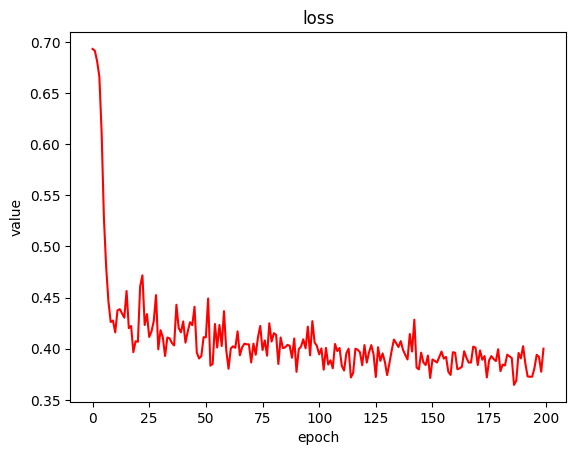

In [5]:
import matplotlib.pyplot as plt
# 绘制曲线
plt.plot(loss_list, label='loss', color='red')
# 添加标题和图例
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('value')
# 显示图形
plt.show()

In [6]:
# import numpy as np
# label_0 = np.load('Train_data/Downstream/0/label_0-8.npy') ## 2\6
# label_1 = np.load('Train_data/Downstream/1/label_1-8.npy')
# print(label_0.shape,label_1.shape)

In [7]:
# import matplotlib.pyplot as plt
# for i in range(label_0.shape[0]):
#     # 绘制曲线
#     plt.plot(label_1[i,:], label='label_1', color='blue')
#     plt.plot(label_0[i,:], label='label_0', color='red')
#     # 添加标题和图例
#     plt.title('channel--'+str(i))
#     plt.xlabel('time')
#     plt.ylabel('value')
#     # 显示图形
#     plt.show()